In [1]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import MetaTrader5 as mt5
import time
import struct
import os
# import trinket
# Модуль 1 подключение библиотек и зависимостей

In [2]:
# подключимся к MetaTrader 5
if not mt5.initialize():
    print("initialize() failed")
    quit()

In [3]:
def take_rates():
    utc_from = datetime.now() - timedelta(minutes=15)
    gbpusd_rates = mt5.copy_rates_from("GBPUSD", mt5.TIMEFRAME_M15, utc_from, 15)
    eurusd_rates = mt5.copy_rates_from("EURUSD", mt5.TIMEFRAME_M15, utc_from, 15)
    return gbpusd_rates, eurusd_rates

In [4]:
def calculation(rate1, rate2):
    spread = take_rates()[0]['close'] - take_rates()[1]['close'] * 1.2 # Вычисляем спред
    spread = np.array(spread)
    plt.plot(take_rates()[0]['close'])
    median = np.median(spread)
    Open_up = list()
    Open_down = list()
    Open_UP =0
    Open_DOWN = 0
    #Вычисляем верхнюю и нижнюю границу
    for i in range(0,len(spread)):
        if spread[i] > median:
            Open_up.append(spread[i])
        if spread[i] < median:
            Open_down.append(spread[i])
    Open_UP =np.median(Open_up)
    Open_DOWN = np.median(Open_down)
    return Open_UP, Open_DOWN, median

In [7]:
last_tick_EURUSD = mt5.copy_rates_from("EURUSD", mt5.TIMEFRAME_M1, datetime.now() - timedelta(minutes=1), 1)['close'][0]
last_tick_GPBUSD = mt5.copy_rates_from("GBPUSD", mt5.TIMEFRAME_M1, datetime.now() - timedelta(minutes=1), 1)['close'][0]
last_spread = last_tick_GPBUSD - last_tick_EURUSD * 1.2
last_spread

-0.04041799999999984

-0.03739399999999993
-0.03805800000000015
-0.03774399999999978


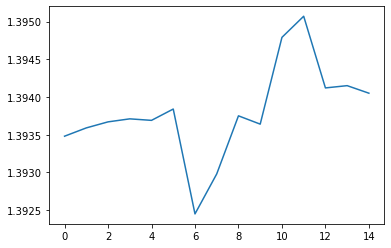

In [8]:
values = calculation(take_rates()[0]['close'], take_rates()[1]['close'])
print(values[0])
print(values[1])
print(values[2])

In [157]:
    
    gbprub_ticks = mt5.copy_ticks_range("GBPUSD",
                                         datetime.now() - timedelta(minutes=15),
                                         datetime.now(),
                                         mt5.COPY_TICKS_ALL)
# # пока на этом этапе верно 1 
    usdrub_ticks = mt5.copy_ticks_range("EURUSD", 
                                         datetime.now() - timedelta(minutes=15),
                                         datetime.now(),
                                         mt5.COPY_TICKS_ALL)

In [4]:
gbprub_ticks = mt5.copy_ticks_range("GBPUSD",
                                         datetime.now() - timedelta(minutes=5),
                                         datetime.now(),
                                         mt5.COPY_TICKS_ALL)
# # пока на этом этапе верно 1 
eurrub_ticks = mt5.copy_ticks_range("EURUSD", 
                                         datetime.now() - timedelta(minutes=5),
                                         datetime.now(),
                                         mt5.COPY_TICKS_ALL)
gbprub_ticks_frame = pd.DataFrame(gbprub_ticks)
eurrub_ticks_frame = pd.DataFrame(eurrub_ticks)
gbprub_ticks_frame['time']=pd.to_datetime(gbprub_ticks_frame['time'], unit='s')
eurrub_ticks_frame['time']=pd.to_datetime(eurrub_ticks_frame['time'], unit='s')
a = gbprub_ticks_frame.head(1)
b = eurrub_ticks_frame.head(1)
advance_gpb = gbprub_ticks_frame['ask'][100] - gbprub_ticks_frame['ask'][0]
advance_euro = eurrub_ticks_frame['ask'][100] - eurrub_ticks_frame['ask'][0]

In [6]:
# подготовка запроса
symbol_Euro = "EURUSD"
symbol_Gbp = "GBPUSD"
symbol_Euro_info =mt5.symbol_info(symbol_Euro)
symbol_Gbp_info =mt5.symbol_info(symbol_Gbp)
lot = 0.01
point_euro = mt5.symbol_info(symbol_Euro).point 
point_gbp = mt5.symbol_info(symbol_Gbp).point
deviation = 1 # deviation = отклонение
# запросы
#  struct MqlTradeRequest
#   {
#    ENUM_TRADE_REQUEST_ACTIONS    action;           // Тип выполняемого действия
#    ulong                         magic;            // Штамп эксперта (идентификатор magic number)
#    ulong                         order;            // Тикет ордера
#    string                        symbol;           // Имя торгового инструмента
#    double                        volume;           // Запрашиваемый объем сделки в лотах
#    double                        price;            // Цена 
#    double                        stoplimit;        // Уровень StopLimit ордера
#    double                        sl;               // Уровень Stop Loss ордера
#    double                        tp;               // Уровень Take Profit ордера
#    ulong                         deviation;        // Максимально приемлемое отклонение от запрашиваемой цены
#    ENUM_ORDER_TYPE               type;             // Тип ордера
#    ENUM_ORDER_TYPE_FILLING       type_filling;     // Тип ордера по исполнению
#    ENUM_ORDER_TYPE_TIME          type_time;        // Тип ордера по времени действия
#    datetime                      expiration;       // Срок истечения ордера (для ордеров типа ORDER_TIME_SPECIFIED)
#    string                        comment;          // Комментарий к ордеру
#    ulong                         position;         // Тикет позиции
#    ulong                         position_by;      // Тикет встречной позиции
#   };
request_euro_sell = {
"action": mt5.TRADE_ACTION_DEAL,# Совершить сделку прямо сейчас
"symbol": symbol_Euro, # Сделка EURRUB
"volume": lot, # Объем который мы покупаем
"type": mt5.ORDER_TYPE_SELL, # Покупаем или продаём  
#"price": price, # Для .TRADE_ACTION_DEAL не требуется
"deviation": deviation, # Максимальное отклонение от заданной цены
"magic": 123456, #Идентификатор эксперта. Позволяет организовать аналитическую обработку торговых ордеров.
"comment": "продали евро",
"type_time": mt5.ORDER_TIME_GTC,
"type_filling": mt5.ORDER_FILLING_FOK,   #не будет продажи если нет необходимого обьема 
    
                                            #Означает согласие совершить сделку 
                                            #по максимально доступному на рынке 
                                            #объему в пределах указанного в ордере. 
                                            #В случае невозможности полного исполнения ордер 
                                            #будет исполнен на доступный объем, а неисполненный объем ордера будет отменен.
}
request_gbp_buy= {
"action": mt5.TRADE_ACTION_DEAL,
"symbol": symbol_Gbp, # Сделка GBPRUB
"volume": lot,
"type": mt5.ORDER_TYPE_BUY, 
"deviation": deviation,
"magic": 123456, #Идентификатор эксперта. Позволяет организовать аналитическую обработку торговых ордеров.
"comment": "купили евро",
"type_time": mt5.ORDER_TIME_GTC,        # Ордер будет находиться в очереди до тех пор, пока не будет снят
"type_filling": mt5.ORDER_FILLING_FOK,      
}

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
order_euro_sell = mt5.order_send(request_euro_sell)
order_gbp_buy = mt5.order_send(request_gbp_buy)
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
request_euro_buy = { 
"action": mt5.TRADE_ACTION_DEAL, 
"symbol": symbol_Euro, 
"volume": lot, 
"type": mt5.ORDER_TYPE_BUY,
"position": order_euro_sell.order,
"deviation": deviation, 
"magic": 123456, 
"comment": "купили евро", 
"type_time": mt5.ORDER_TIME_GTC, 
"type_filling": mt5.ORDER_FILLING_FOK, 
}
request_gbp_sell = {
"action": mt5.TRADE_ACTION_DEAL,
"symbol": symbol_Gbp, # Сделка GBPRUB
"volume": lot, # Объем который мы покупаем
"type": mt5.ORDER_TYPE_SELL,
"position": order_gbp_buy.order,
"deviation": deviation,
"magic": 123456, #Идентификатор эксперта. Позволяет организовать аналитическую обработку торговых ордеров.
"comment": "продажа фунта",
"type_time": mt5.ORDER_TIME_GTC,        # Ордер будет находиться в очереди до тех пор, пока не будет снят
"type_filling": mt5.ORDER_FILLING_FOK,   
}
request_euro_buy_all= {
"action": mt5.TRADE_ACTION_DEAL,# Совершить сделку прямо сейчас
"symbol": symbol_Euro, # Сделка EURRUB
"volume": 10.0,
"type": mt5.ORDER_TYPE_BUY, # Покупаем или продаём
"position": order_euro_sell.order,
"deviation": deviation, # Максимальное отклонение от заданной цены
"magic": 123456, #Идентификатор эксперта. Позволяет организовать аналитическую обработку торговых ордеров.
"comment": "продали доллар",
"type_time": mt5.ORDER_TIME_GTC,
"type_filling": mt5.ORDER_FILLING_IOC,
}
request_gbp_sell_all= {
"action": mt5.TRADE_ACTION_DEAL,
"symbol": symbol_Gbp, # Сделка GBPRUB
"volume": 10.0,
"type": mt5.ORDER_TYPE_SELL,
"position": order_gbp_buy.order,
"deviation": deviation,
"magic": 123456, #Идентификатор эксперта. Позволяет организовать аналитическую обработку торговых ордеров.
"comment": "купили евро",
"type_time": mt5.ORDER_TIME_GTC,        # Ордер будет находиться в очереди до тех пор, пока не будет снят
"type_filling": mt5.ORDER_FILLING_IOC,
}

In [8]:
print(order_euro_sell)

OrderSendResult(retcode=10009, deal=214173876, order=217232088, volume=0.01, price=1.2043, bid=0.0, ask=0.0, comment='Request executed', request_id=1, retcode_external=0, request=TradeRequest(action=1, magic=123456, order=0, symbol='EURUSD', volume=0.01, price=0.0, stoplimit=0.0, sl=0.0, tp=0.0, deviation=1, type=1, type_filling=0, type_time=0, expiration=0, comment='продали евро', position=0, position_by=0))


In [6]:
def ticks_to_df(gbprub_ticks,eurrub_ticks):
    #Переведем имеющиеся у нас данные в DataFrame
    gbprub_ticks_frame = pd.DataFrame(gbprub_ticks)
    eurrub_ticks_frame = pd.DataFrame(eurrub_ticks)
    #Время в MetaTrader 5 хранится в UTC таймзоне, поэтому переведем в привычный нам вид
    gbprub_ticks_frame['time']=pd.to_datetime(gbprub_ticks_frame['time'], unit='s')
    eurrub_ticks_frame['time']=pd.to_datetime(eurrub_ticks_frame['time'], unit='s')
    
    advance_gpb = gbprub_ticks_frame[0]['ask'] - gbprub_ticks_frame[-100]['ask']
    advance_euro = eurrub_ticks_frame[0]['ask'] - eurrub_ticks_frame[-100]['ask']
    
    #Удалим ненужные столбцы
    gbprub_ticks_frame.drop('ask', axis = 1, inplace = True)
    gbprub_ticks_frame.drop('flags', axis = 1, inplace = True)
    gbprub_ticks_frame.drop('volume_real', axis = 1, inplace = True)
    gbprub_ticks_frame.drop('last', axis = 1, inplace = True)
    gbprub_ticks_frame.drop('volume', axis = 1, inplace = True)

    eurrub_ticks_frame.drop('bid', axis = 1, inplace = True)
    eurrub_ticks_frame.drop('flags', axis = 1, inplace = True)
    eurrub_ticks_frame.drop('volume_real', axis = 1, inplace = True)
    eurrub_ticks_frame.drop('last', axis = 1, inplace = True)
    eurrub_ticks_frame.drop('volume', axis = 1, inplace = True)
    return eurrub_ticks_frame, gbprub_ticks_frame, advance_gpb,advance_gpb

In [7]:
def change_ticks_df(eurorub_ticks_frame,gbprub_ticks_frame):
    position_gbp = 0
    position_euro = 0
    old_gbp = gbprub_ticks_frame['bid'][0]
    old_euro = eurorub_ticks_frame['ask'][0]
    current_euro = old_euro
    current_gbp = old_gbp
    spread = []
#     
    while(position_gbp <= len(gbprub_ticks_frame['time'])):

        if(gbprub_ticks_frame['time_msc'][position_gbp] >= eurorub_ticks_frame['time_msc'][position_euro]):

            current_euro = eurorub_ticks_frame['ask'][position_euro]
            spread.append(current_gbp - current_euro)
            old_euro = eurorub_ticks_frame['ask'][position_euro]
            if position_euro >= len(eurorub_ticks_frame['time']) - 1:
                break
            position_euro += 1
        else:

            current_gbp = gbprub_ticks_frame['bid'][position_gbp]
            spread.append(current_gbp - old_euro)
            if position_gbp >= len(gbprub_ticks_frame['time']) - 1:
                break
            position_gbp += 1
    return spread

In [8]:
def open_close(spread):
    #максимальное и минимальное значение
    max_spread = max(spread)
    min_spread = min(spread)
    #Найдём медиану
    spread = np.array(spread)
    median = np.median(spread)
    print('median:     ',median,
          '\nmax spread: ', max_spread,
          '\nmin_spread: ',min_spread)
    Open = median + (max_spread - median) * 0.1
    print('Open:', Open)
    Close = median #+ (min_spread - median) * 0.01
    print('Close', Close)
    return Open, Close

In [9]:
def request_open_pos(): 
    result =mt5.order_send(request_gbp_buy) 
    result2 = mt5.order_send(request_euro_sell) #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    print('Открыл')
#    print(result)
#    print(result2)

In [10]:
def request_close_pos():
    result = mt5.order_send(request_gbp_sell) 
    result2 = mt5.order_send(request_euro_buy)
    print('Закрыл')
#    print(result)
#    print(result2)

In [11]:
def request_close_pos_all():
    result = mt5.order_send(request_gbp_sell_all) 
    result2 = mt5.order_send(request_euro_buy_all) #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #print('Закрыли все позиции')
    print(result)
    print(result2)

In [12]:
take_ticks()
a = ticks_to_df(take_ticks()[0],take_ticks()[1])

KeyError: 0

In [13]:
b = change_ticks_df(a[0], a[1])

KeyError: 0

In [14]:
Open,Close = open_close(b)

TypeError: '<' not supported between instances of 'float' and 'Timestamp'

In [ ]:
# Цикл основанный на единечной покупке и продаже
buy_gpb = list()
buy_euro = list()
a = True 
b = True
while(True):
    if (datetime.now().minute % 5 == 0) and datetime.now().second == 0:
        file_obj = open('QuantityOpenClose.txt', 'a')
        Quant_op = 'Quantity open: ' + str(quantity_open)+'\n'
        Quant_cl = 'Quantity close: ' + str(quantity_close)+'\n'
        Money = str(mt5.account_info().balance - balance_old) + '\n'
        balance_old = mt5.account_info().balance
        file_obj.write(Quant_op)
        file_obj.write(Quant_cl)
        file_obj.write(Money)
        file_obj.close()
        request_close_pos_all()
        Open,Close = open_close(spread1)
        spread1 = []
        quantity_open = 0
        quantity_close = 0
        time.sleep(1)
#     if datetime.now().second == 2:
#         print('уцкцукн35нг6ш')
#         Open,Close = open_close(spread1)
#         spread1 = []
#         time.sleep(1)
    last_tick_EURUSD = mt5.symbol_info_tick("EURUSD").bid
    last_tick_GPBUSD = mt5.symbol_info_tick("GBPUSD").ask
    bid_EURO = mt5.symbol_info_tick("EURUSD").bid
    bid_GPB = mt5.symbol_info_tick("GBPUSD").bid
    ask_EURO = mt5.symbol_info_tick("EURUSD").ask
    ask_GPB = mt5.symbol_info_tick("GBPUSD").ask
    last_spread = last_tick_GPBUSD - last_tick_EURUSD
#   print(last_spread)
    spread1.append(last_spread)
#     print('last_spread:',last_spread)
#     print('Close:',Close * 0.99)
#  упорядочить массив в начале минимальные
    if advance_gpb > 0 and a == True:
        a = False
        buy_gpb.append(ask_GPB)
        mt5.order_send(request_gbp_buy)
    else:
        for item in buy_gpb:
            if item - bid_GPB > 0:
                mt5.order_send(request_gbp_sell)
                a = True
    if advance_euro > 0 and b == True:
        buy_euro.append(ask_EURO)
        b = False
    else:
        for item in buy_euro:
            if item - bid_EURO > 0:
                mt5.order_send(request_euro_sell)
                b = True
#     if last_spread > Open and a == True:
#         a = False
#         request_open_pos() # Написать Функции
#         buy_gpb.append(last_tick_GPBUSD)
#     if last_spread < Close and a == False:
#         a = True
#         request_close_pos()